In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({'font.size': 16})

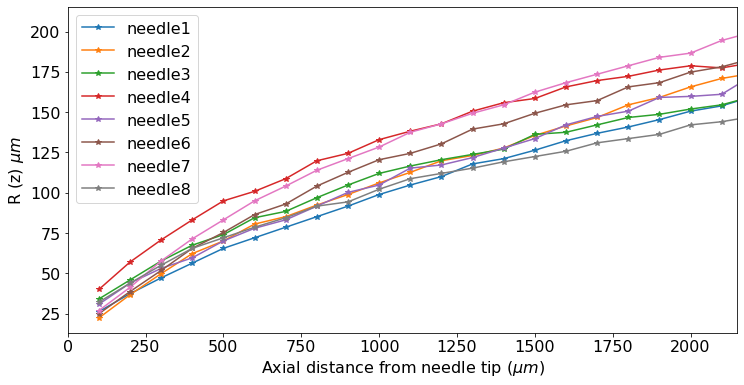

In [3]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
for filename in os.listdir('Selected Needles 1/'):
    with open('Selected Needles 1/' + filename,'r') as f:
        data = f.readlines()
        z = np.array([])
        r = np.array([])
        for line in data[2:]:
            z = np.append(z,float(line.strip().split('\t')[0]))
            r = np.append(r,float(line.strip().split('\t')[1])*0.5)
        ax.plot(z,r,'-*',label = filename.split('.')[0] )
ax.set_xlim((0,2150))
ax.set_xlabel('Axial distance from needle tip ($\mu m$)')
ax.set_ylabel('R (z) $\mu m$')
ax.legend()
#plt.savefig('needle_plots.svg')
plt.show()

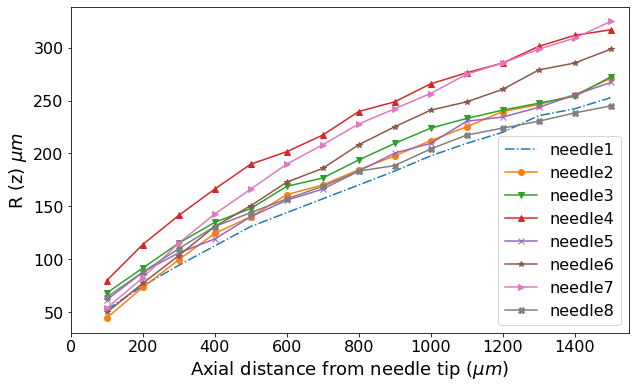

In [56]:
fig = plt.figure(figsize=(10,6))
#fig.suptitle('a) Measured needle profiles')
ax = fig.add_subplot(111)
markers = ['.','o','v','^','x','*','>','X']
i=0
for filename in os.listdir('Selected Needles 1/'):
    with open('Selected Needles 1/' + filename,'r') as f:
        data = f.readlines()
        z = np.array([])
        r = np.array([])
        for line in data[2:]:
            z = np.append(z,float(line.strip().split('\t')[0]))
            r = np.append(r,float(line.strip().split('\t')[1]))
        ax.plot(np.flip(z)[0:15],np.flip(r)[0:15],'-'+markers[i],label = filename.split('.')[0] )
        i = i + 1
ax.set_xlim((0,1550))
ax.set_xlabel('Axial distance from needle tip ($\mu m$)',Fontsize=18)
ax.set_ylabel('R (z) $\mu m$',Fontsize=18)
ax.legend()
plt.savefig('needle_plots.pdf')
plt.show()

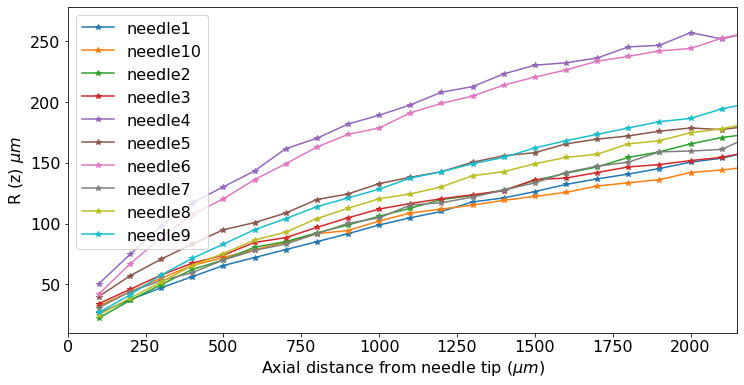

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
for filename in os.listdir('Repeatability tests/'):
    with open('Repeatability tests/' + filename,'r') as f:
        data = f.readlines()
        z = np.array([])
        r = np.array([])
        for line in data[2:]:
            z = np.append(z,float(line.strip().split('\t')[0]))
            r = np.append(r,float(line.strip().split('\t')[1])*0.5)
        ax.plot(z,r,'-*',label = filename.split('.')[0] )
ax.set_xlim((0,2150))
ax.set_xlabel('Axial distance from needle tip ($\mu m$)')
ax.set_ylabel('R (z) $\mu m$')
ax.legend()
#plt.savefig('needle_plots.jpg')
plt.show()

In [8]:
def get_data(filepath):
    with open(filepath,'r') as f:
        data = f.readlines()
        z = np.array([])
        r = np.array([])
        for line in data[2:]:
            z = np.append(z,float(line.strip().split('\t')[0]))
            r = np.append(r,float(line.strip().split('\t')[1])*0.5)
            z.sort()
            r.sort()
        return z,r

In [42]:
def plot_data(z,r):
    fig = plt.figure(figsize = (16,4))
    ax = fig.add_subplot(111)
    ax.plot(z,r)
def fit_and_plot(z,r):
    def func(z,A_0,A_1):
        return A_0*z**A_1
    error = np.zeros(z.size)
    error.fill(10)
    popt,pcov = curve_fit(func,z,r,sigma = error,bounds=(0,10))
    r_fit = func(z,*popt)
    fig = plt.figure(figsize=(16,4))
    ax = fig.add_subplot(111)
    ax.plot(z,r,'*',label = 'data')
    ax.plot(z,r_fit,label = 'fit')
    ax.legend()
    plt.show()
    print(filename)
    print('A_0 = ', popt[0],'A_1 = ',popt[1])
    return (popt[0],popt[1])

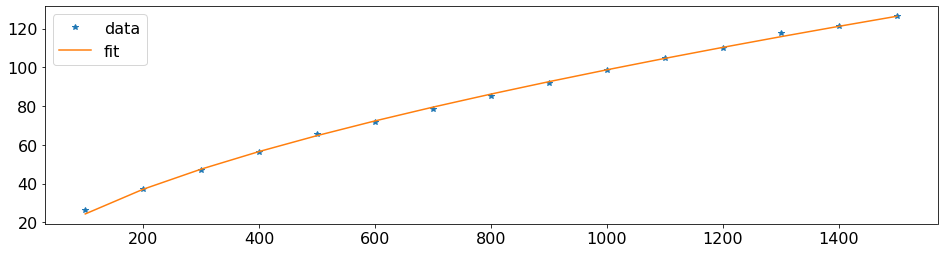

needle1.txt
A_0 =  1.4751506115571074 A_1 =  0.6085704546883733


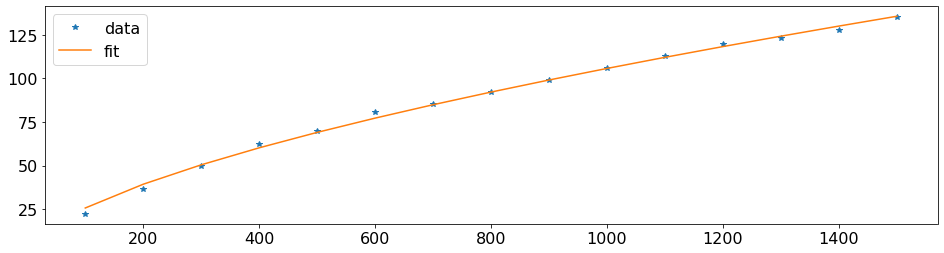

needle2.txt
A_0 =  1.511224815069461 A_1 =  0.6150009511508261


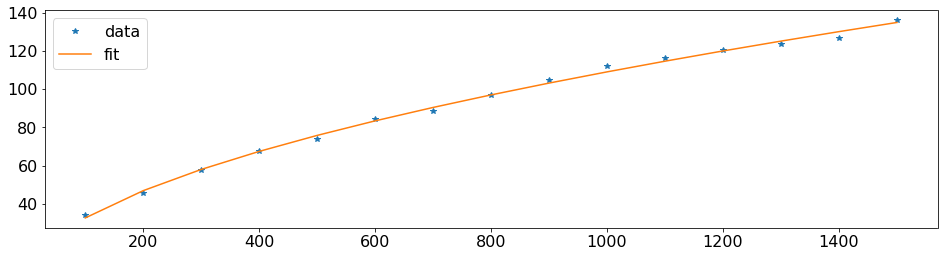

needle3.txt
A_0 =  2.897956529937715 A_1 =  0.525273575672869


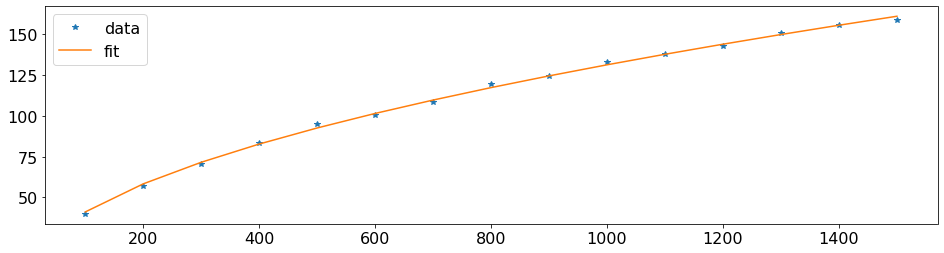

needle4.txt
A_0 =  4.044932855420754 A_1 =  0.5037730481968408


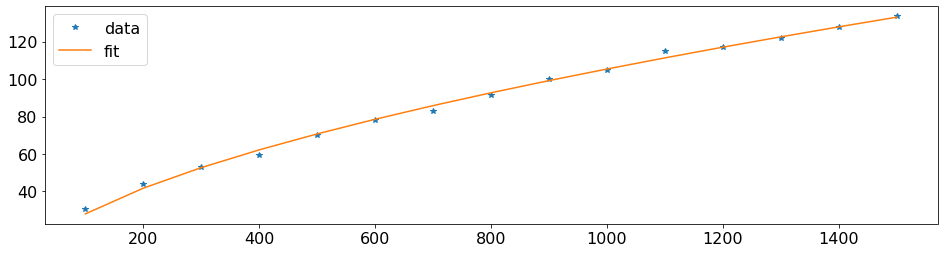

needle5.txt
A_0 =  1.9818353821819945 A_1 =  0.5752688248766524


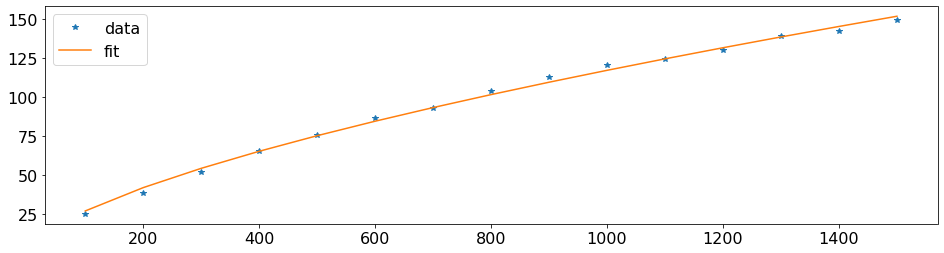

needle6.txt
A_0 =  1.4023477994754983 A_1 =  0.6406343344801411


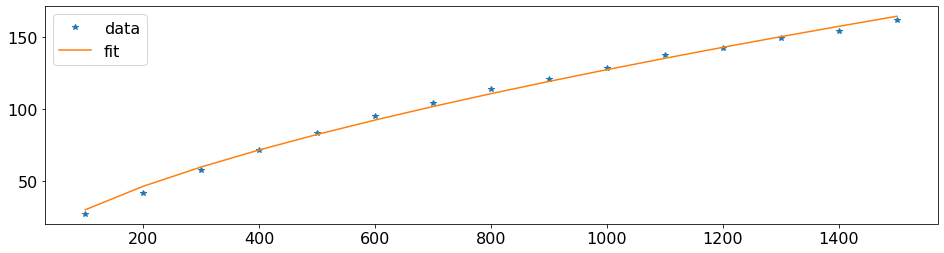

needle7.txt
A_0 =  1.6232836090610265 A_1 =  0.6316763824596638


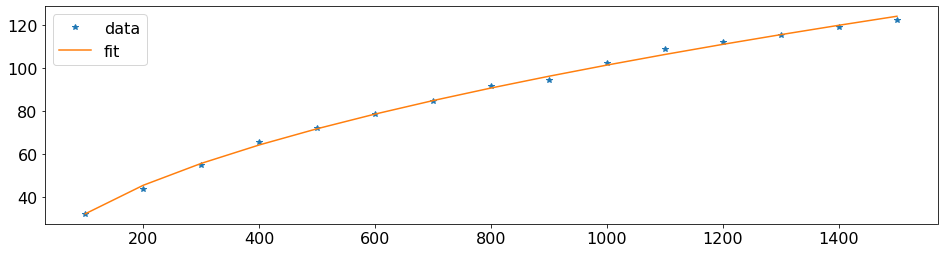

needle8.txt
A_0 =  3.232187528133565 A_1 =  0.49878112201031327


In [44]:
A= []
for filename in os.listdir('Selected Needles 1/'):
    z,r = get_data('Selected Needles 1/' + filename)
    z = z[0:15]
    r = r[0:15]
    A.append(fit_and_plot(z,r))

In [47]:
A=np.array(A)


array([[1.47515061, 0.60857045],
       [1.51122482, 0.61500095],
       [2.89795653, 0.52527358],
       [4.04493286, 0.50377305],
       [1.98183538, 0.57526882],
       [1.4023478 , 0.64063433],
       [1.62328361, 0.63167638],
       [3.23218753, 0.49878112]])

In [52]:
np.average(A[:,0])

2.27111489135464

In [53]:
np.average(A[:,1])

0.5748723366919599

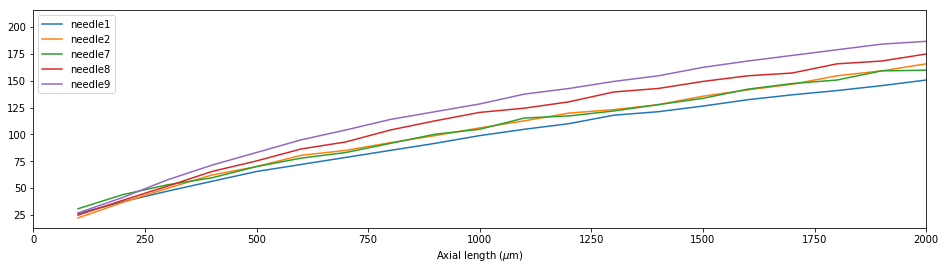

In [9]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
for filename in os.listdir('Selected needles/'):
    with open('Selected needles/' + filename,'r') as f:
        data = f.readlines()
        z = np.array([])
        r = np.array([])
        for line in data[2:]:
            z = np.append(z,float(line.strip().split('\t')[0]))
            r = np.append(r,float(line.strip().split('\t')[1])*0.5)
        ax.plot(z,r,label = filename.split('.')[0] )
        ax.set_xlabel('Axial length ($\mu$m)')
ax.set_xlim((0,2000))
ax.legend()
plt.show()

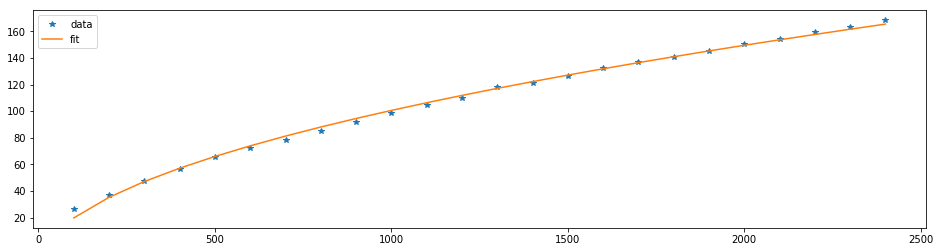

needle1.txt
A_0 =  -17.5760835858737 A_1 =  3.734664299656818


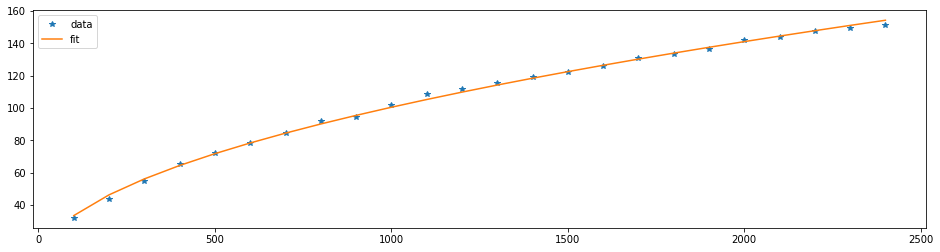

needle10.txt
A_0 =  2.5752076231088656 A_1 =  3.095098615656423


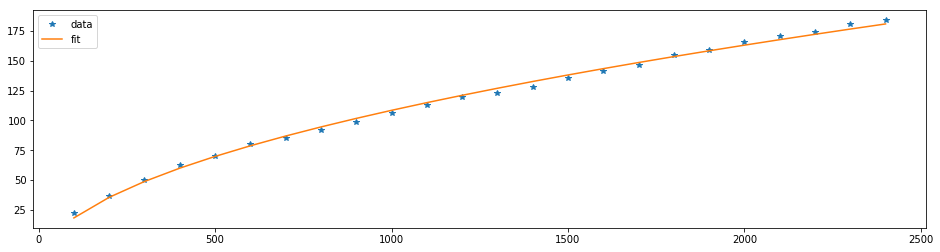

needle2.txt
A_0 =  -23.55649271243896 A_1 =  4.173326382234857


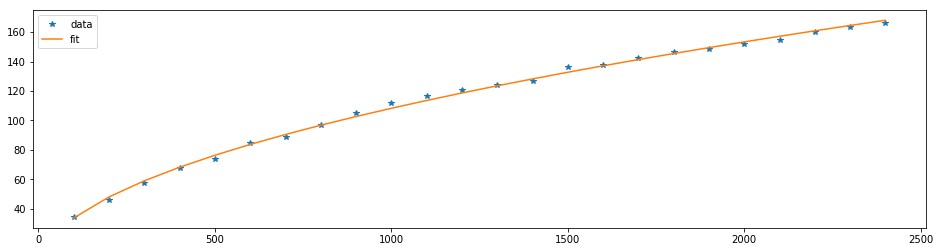

needle3.txt
A_0 =  -0.8206777950053199 A_1 =  3.447898961020894


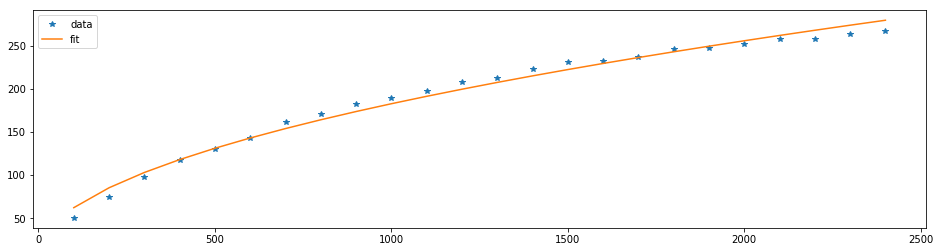

needle4.txt
A_0 =  6.594381277587559 A_1 =  5.56907393296463


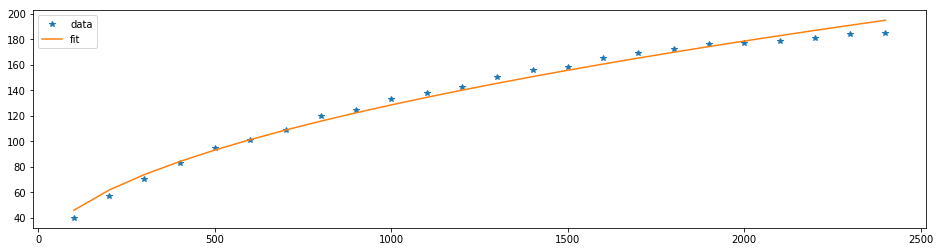

needle5.txt
A_0 =  7.711832473032768 A_1 =  3.8232562214346197


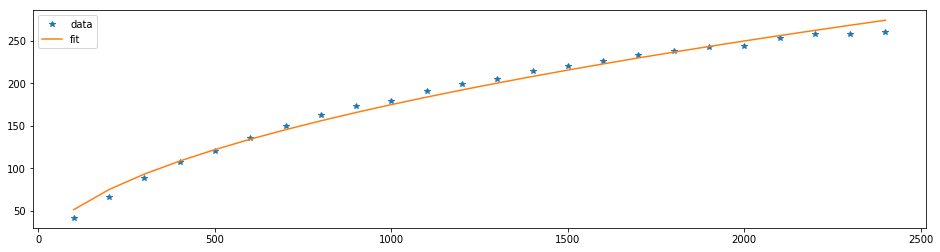

needle6.txt
A_0 =  -5.424652153895543 A_1 =  5.703752988380733


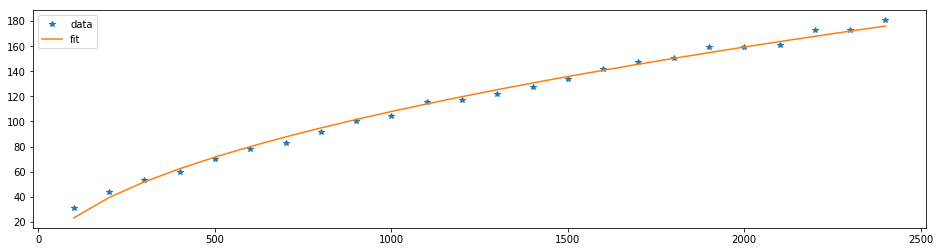

needle7.txt
A_0 =  -16.095388843452355 A_1 =  3.922827780259744


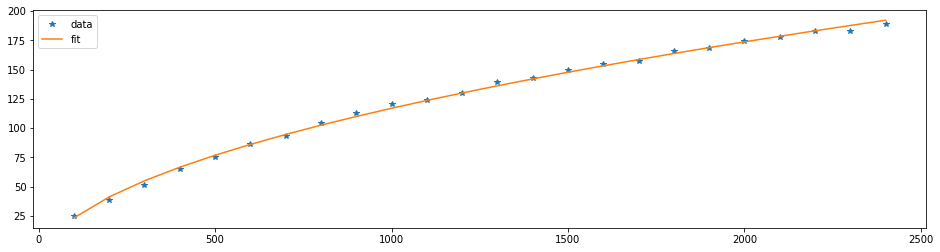

needle8.txt
A_0 =  -19.95553189065584 A_1 =  4.329255993861346


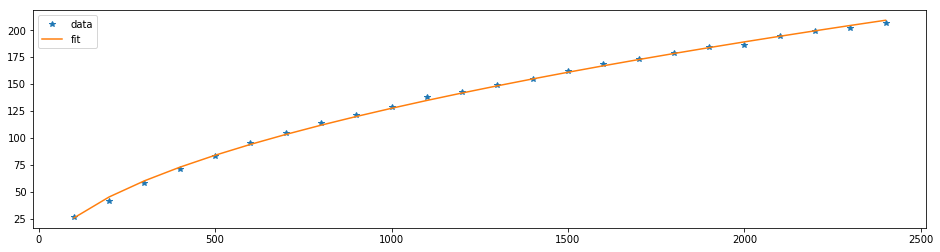

needle9.txt
A_0 =  -21.455006517393276 A_1 =  4.709242383735345
-8.800241212498578 4.25083975592054


In [29]:
A_0 = 0
A_1 = 0
for filename in os.listdir('Repeatability tests/'):
    z,r = get_data('Repeatability tests/' + filename)
    A = fit_and_plot(z,r)
    A_0 = A_0 + A[0]
    A_1 = A_1 + A[1]
print(A_0/10,A_1/10)

In [26]:
A_0

-21.455006517393276

In [ ]:
def fit_and_plot(z,r):
    def func(z,A_0,A_1):
        return A_0 + A_1*z**0.5
    error = np.zeros(z.size)
    error.fill(10)
    popt,pcov = curve_fit(func,z,r,sigma = error)
    r_fit = func(z,*popt)
    fig = plt.figure(figsize=(16,4))
    ax = fig.add_subplot(111)
    ax.plot(z,r,'*',label = 'data')
    ax.plot(z,r_fit,label = 'fit')
    ax.legend()
    plt.show()
    print(filename)
    print('A_0 = ', popt[0],'A_1 = ',popt[1])
    return (popt[0],popt[1])